# 1. Import Library

In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations on data
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization

from sklearn.preprocessing import StandardScaler  # Perform scaling
from sklearn.model_selection import train_test_split  # Split data into training and testing sets

# ML model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Measure model accuracy and display summary statistics of model performance
import streamlit as st  # Model deployment

from imblearn.over_sampling import SMOTE

import itertools

# 2. Analisis Data Eksploratif (EDA) & Pra-Pemrosesan Data

PIC : July, Ola, Osha, Faza

## 2.1 Membaca Dataset

In [2]:
# Mengambil dataset dari URL
url = "https://raw.githubusercontent.com/nuraulaola/ds-batch-32-final-project/main/datasets/Dataset1_Customer_Churn.csv"
df = pd.read_csv(url)

# Menampilkan lima baris pertama dari dataset untuk memahami struktur data
df.head()

,CustomerId,Gender,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
0,15634602,Female,42,619,101348.88,1,1
1,15647311,Female,41,608,112542.58,0,0
2,15619304,Female,42,502,113931.57,1,1
3,15701354,Female,39,699,93826.63,0,0
4,15737888,Female,43,850,79084.10,1,0


Deskripsi Data

Cerita Dataset:

- Dataset ini terdiri dari total 10.000 baris (entries) dengan rentang indeks baris dari 0 hingga 9999, dan terdapat 7 kolom.
- Variabel independen melibatkan Gender, Age, CreditScore, EstimatedSalary, dan HasCrCard, yang berisi informasi tentang pelanggan.
- Variabel dependen adalah Exited, yang menunjukkan apakah pelanggan tersebut telah meninggalkan layanan.

Fitur:

- CustomerId: ID unik untuk setiap pelanggan.
- Gender: Jenis kelamin pelanggan (Female / Male).
- Age: Usia pelanggan.
- CreditScore: Skor kredit pelanggan.
- EstimatedSalary: Perkiraan gaji pelanggan.
- HasCrCard: Menunjukkan apakah pelanggan memiliki kartu kredit (1 untuk ya, 0 untuk tidak).
- Exited: Variabel target yang menunjukkan apakah pelanggan telah keluar dari layanan (1 untuk ya, 0 untuk tidak).

In [3]:
# Mendefinisikan nama variabel dependen yang merupakan target analisis
dependent_variable_name = "Exited"

## 2.2 EDA

### 2.2.1 Analisis Missing Values dan Jumlah Nilai Unik di Setiap Kolom

In [4]:
# Memeriksa missing values
missing_values = df.isnull().sum()

# Menampilkan jumlah missing values
print("Jumlah missing values:")
print(missing_values)

# Menampilkan jumlah nilai unik dari setiap variabel dalam dataframe
def show_unique_count_variables(df):
    # Menghitung jumlah nilai unik
    unique_counts = df.nunique()

    # Menampilkan jumlah nilai unik
    print("\nJumlah nilai unik:")
    print(unique_counts)

# Menggunakan fungsi untuk menampilkan jumlah nilai unik
show_unique_count_variables(df)

Jumlah missing values:
CustomerId         0
Gender             0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Exited             0
dtype: int64

Jumlah nilai unik:
CustomerId         10000
Gender                 2
Age                   70
CreditScore          460
EstimatedSalary     9999
HasCrCard              2
Exited                 2
dtype: int64


### 2.2.2 Analisis Nilai-Nilai Yang Duplikat

In [5]:
# Memeriksa nilai-nilai yang duplikat
duplicate_rows = df[df.duplicated()]

# Menampilkan baris yang merupakan duplikat
print("Duplikat dalam DataFrame:")
print(duplicate_rows)

Duplikat dalam DataFrame:
Empty DataFrame
Columns: [CustomerId, Gender, Age, CreditScore, EstimatedSalary, HasCrCard, Exited]
Index: []


### 2.2.3 Overview Tipe Data dari Setiap Kolom

In [6]:
# Memeriksa tipe data dari setiap kolom
column_data_types = df.dtypes

# Menampilkan tipe data dari setiap kolom
print("Tipe data dari setiap kolom:")
print(column_data_types)

Tipe data dari setiap kolom:
CustomerId           int64
Gender              object
Age                  int64
CreditScore          int64
EstimatedSalary    float64
HasCrCard            int64
Exited               int64
dtype: object


### 2.2.4 Informasi Umum DataFrame

In [7]:
# Menampilkan informasi umum mengenai DataFrame
print("Informasi umum mengenai DataFrame:")
df.info()

Informasi umum mengenai DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   EstimatedSalary  10000 non-null  float64
 5   HasCrCard        10000 non-null  int64  
 6   Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 547.0+ KB


### 2.2.5 Rangkuman Statistik Deskriptif

In [8]:
# Menampilkan statistik deskriptif singkat
print("Statistik deskriptif dari kolom numerik DataFrame:")
df.describe()

Statistik deskriptif dari kolom numerik DataFrame:


,CustomerId,Age,CreditScore,EstimatedSalary,HasCrCard,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,38.921800,650.528800,100090.239881,0.70550,0.203700
std,7.193619e+04,10.487806,96.653299,57510.492818,0.45584,0.402769
min,1.556570e+07,18.000000,350.000000,11.580000,0.00000,0.000000
25%,1.562853e+07,32.000000,584.000000,51002.110000,0.00000,0.000000
50%,1.569074e+07,37.000000,652.000000,100193.915000,1.00000,0.000000
75%,1.575323e+07,44.000000,718.000000,149388.247500,1.00000,0.000000
max,1.581569e+07,92.000000,850.000000,199992.480000,1.00000,1.000000


### 2.2.6 Plot Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen

Distribusi variabel dependen terhadap beberapa variabel independen:
Exited 0 count: 7963
Exited 1 count: 2037


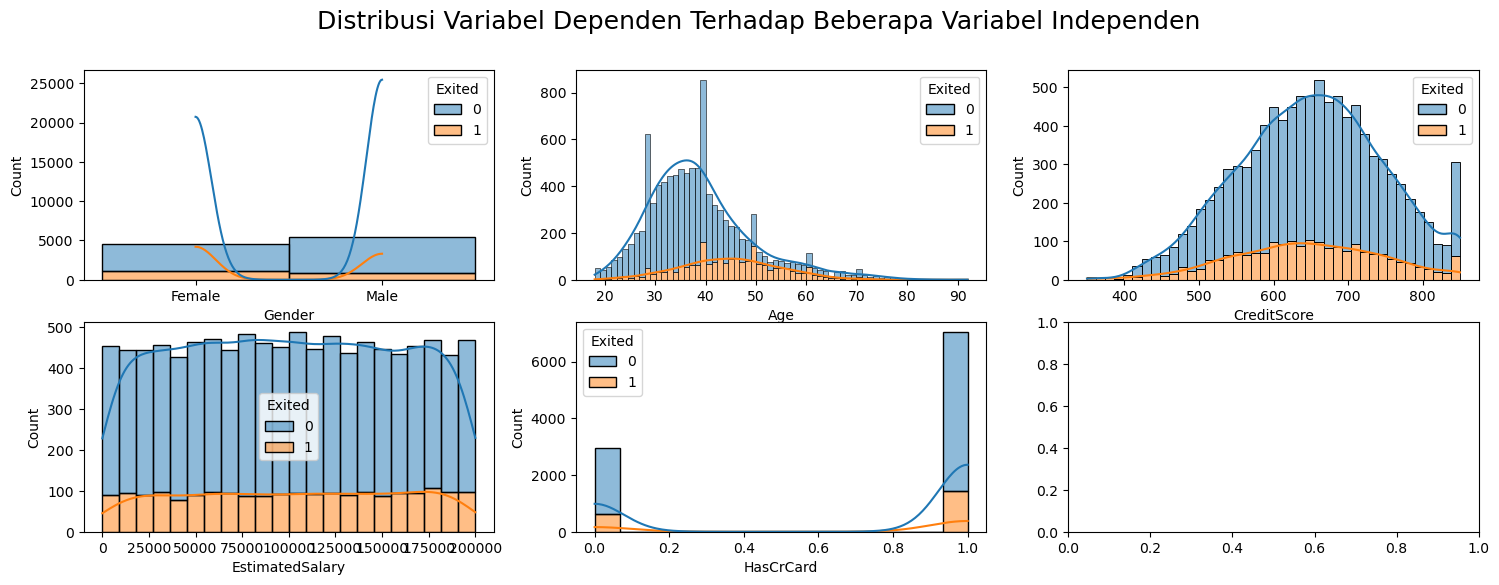

In [9]:
# Menampilkan distribusi variabel dependen terhadap beberapa variabel independen
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender'
sns.histplot(x='Gender', hue='Exited', data=df, ax=axarr[0, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Age'
sns.histplot(x='Age', hue='Exited', data=df, ax=axarr[0, 1], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore'
sns.histplot(x='CreditScore', hue='Exited', data=df, ax=axarr[0, 2], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary'
sns.histplot(x='EstimatedSalary', hue='Exited', data=df, ax=axarr[1, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard'
sns.histplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1, 1], multiple='stack', kde=True)

# Menghitung jumlah nilai 0 (tidak Exited) dan nilai 1 (Exited) pada variabel dependen 'Exited'
zero_count, one_count = df['Exited'].value_counts()
print("Distribusi variabel dependen terhadap beberapa variabel independen:")
print("Exited 0 count:", zero_count)
print("Exited 1 count:", one_count)

fig.suptitle('Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen', fontsize=18)

# Menampilkan plot
plt.show()

1. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender':**
- Female memiliki jumlah yang lebih rendah pada kategori '1' (Exited), yang sesuai dengan rendahnya nilai KDE pada kategori tertentu.
- Male memiliki jumlah yang lebih tinggi pada kategori '0' (Not Exited), yang sesuai dengan tingginya nilai KDE pada kategori tertentu.

2. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'Age':**
- Terdapat peningkatan jumlah Exited dari rentang usia '0-18' hingga '50+', dengan puncaknya pada kategori '50+'. (terlihat dari bentuk distribusi normal yang miring ke kanan / right-skewed)
- Distribusi yang miring ke kanan mencerminkan bahwa sebagian besar nasabah berada di kelompok usia yang lebih muda. Fakta bahwa rentang usia '19-35' memiliki jumlah Exited yang tinggi menunjukkan bahwa di antara nasabah muda, tingkat churn cenderung lebih tinggi.
- Distribusi yang miring ke kanan dapat menunjukkan bahwa meskipun kebanyakan nasabah berada di kelompok usia yang lebih muda, ada juga sejumlah nasabah yang lebih tua di rentang '36-50'. Jumlah Exited yang tinggi di rentang ini menunjukkan bahwa bahkan di antara nasabah yang lebih tua, tingkat churn tetap signifikan.

3. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore':**
- Bentuk distribusi normal menunjukkan bahwa sebagian besar nasabah memiliki CreditScore yang berpusat di sekitar mean.
- Namun, lonjakan di atas sumbu x pada nilai 800 mengindikasikan adanya kelompok kecil tetapi signifikan dari nasabah dengan CreditScore sangat tinggi.

4. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary':**
- Distribusi seragam EstimatedSalary menunjukkan bahwa estimasi pendapatan nasabah cenderung stabil dan tidak mengalami variasi yang signifikan.
- Meskipun demikian, tidak ada pola khusus atau tren yang terlihat dalam hubungannya dengan tingkat churn. Hal ini mengindikasikan bahwa faktor-faktor lain di luar estimasi pendapatan mungkin lebih berperan dalam keputusan nasabah untuk bertahan atau keluar.

5. **Distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard':**
- Terdapat perbedaan yang signifikan antara pemegang kartu kredit (HasCrCard=1) dan bukan pemegang kartu kredit (HasCrCard=0) dalam hal jumlah Exited.
- Pemegang kartu kredit (HasCrCard=1) memiliki jumlah Exited yang lebih tinggi dibandingkan dengan yang bukan pemegang kartu kredit.

### 2.2.7 Plot Distribusi Variabel Numerik

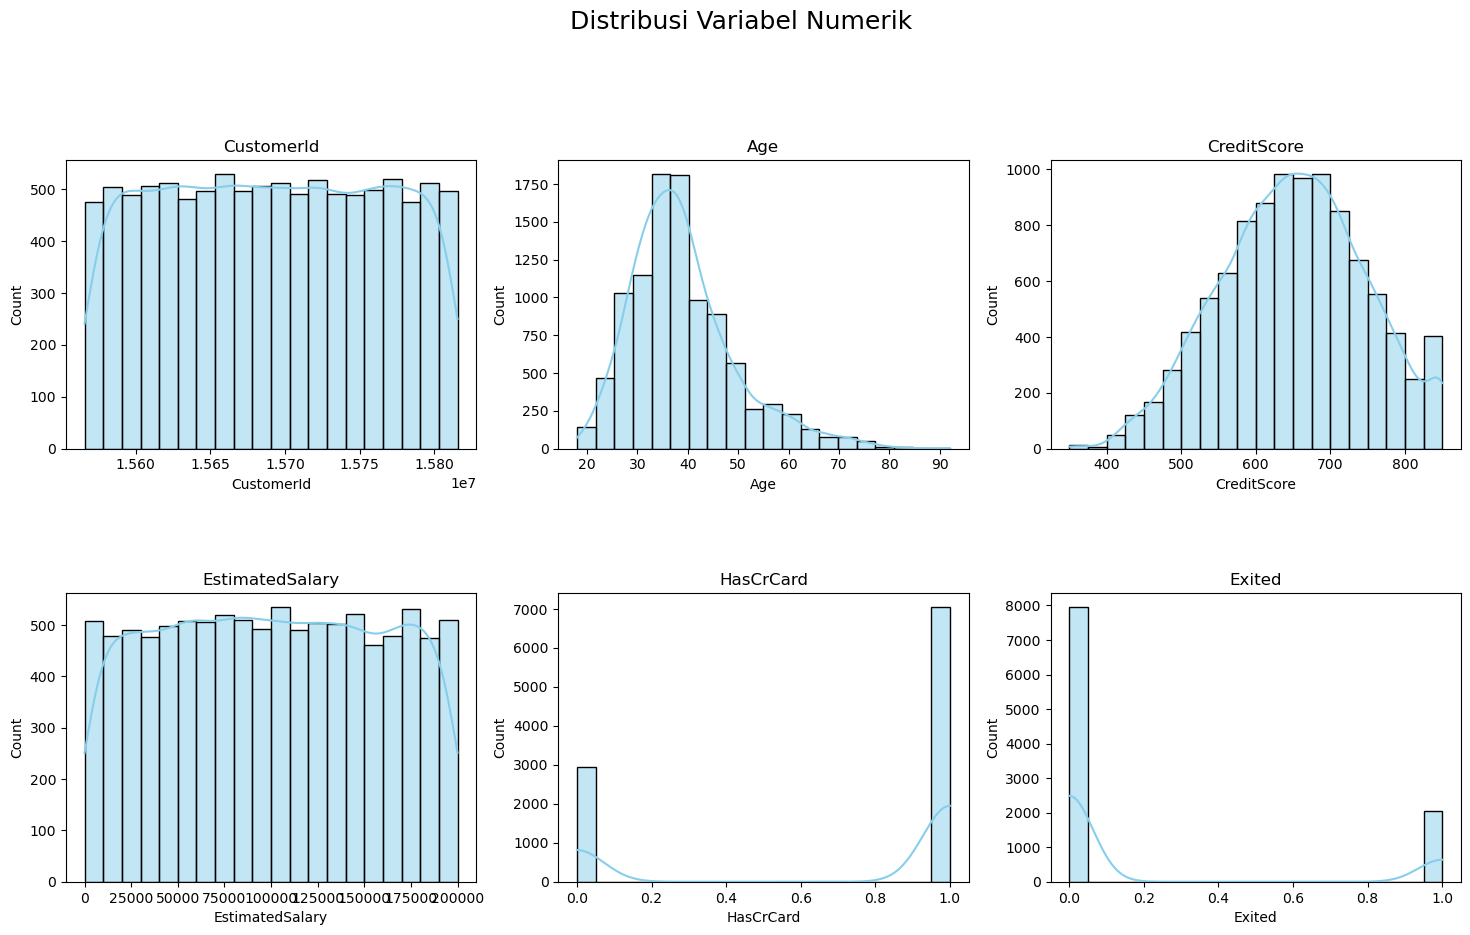

In [10]:
# Menampilkan distribusi variabel numerik dalam DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_cols = df.select_dtypes(include=numerics)
columns = df_num_cols.columns[: len(df_num_cols.columns)]

fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)

fig.suptitle('Distribusi Variabel Numerik', fontsize=18)
plt.show()

1. **Distribusi Variabel "CustomerId":**
- Distribusi variabel "CustomerId" cenderung seragam, dengan jumlah frekuensi relatif stabil di setiap bin edge.

2. **Distribusi Variabel "Age":**
- Distribusi variabel "Age" menunjukkan adanya puncak di sebelah kiri dan landai ke kanan (skewed right).
- Rentang usia dari '19-35' memiliki jumlah frekuensi "Exited" yang lebih tinggi dibandingkan dengan '0-18', tetapi menurun untuk '36-50'.

3. **Distribusi Variabel "CreditScore":**
- Distribusi variabel "CreditScore" memiliki bentuk yang mirip dengan distribusi normal, tetapi terdapat peningkatan yang tiba-tiba melonjak di atas nilai 800.

4. **Distribusi Variabel "EstimatedSalary":**
- Distribusi variabel "EstimatedSalary" cenderung seragam, dengan jumlah frekuensi yang relatif stabil di setiap bin edge.

5. **Distribusi Variabel "HasCrCard":**
- Distribusi variabel "HasCrCard" menunjukkan bahwa pemegang kartu kredit (HasCrCard=1) memiliki jumlah frekuensi "Exited" yang lebih tinggi dibandingkan dengan yang bukan pemegang kartu kredit (HasCrCard=0).

6. **Distribusi Variabel "Exited":**
- Distribusi variabel "Exited" menunjukkan bahwa mayoritas data memiliki label 0 (Not Exited) dengan frekuensi yang tinggi, sementara jumlah frekuensi label 1 (Exited) hanya muncul di akhir (nilai 1.00).

### 2.2.8 Plot Distribusi Variabel Numerik (Spesifik Pelanggan yang Keluar Layanan)

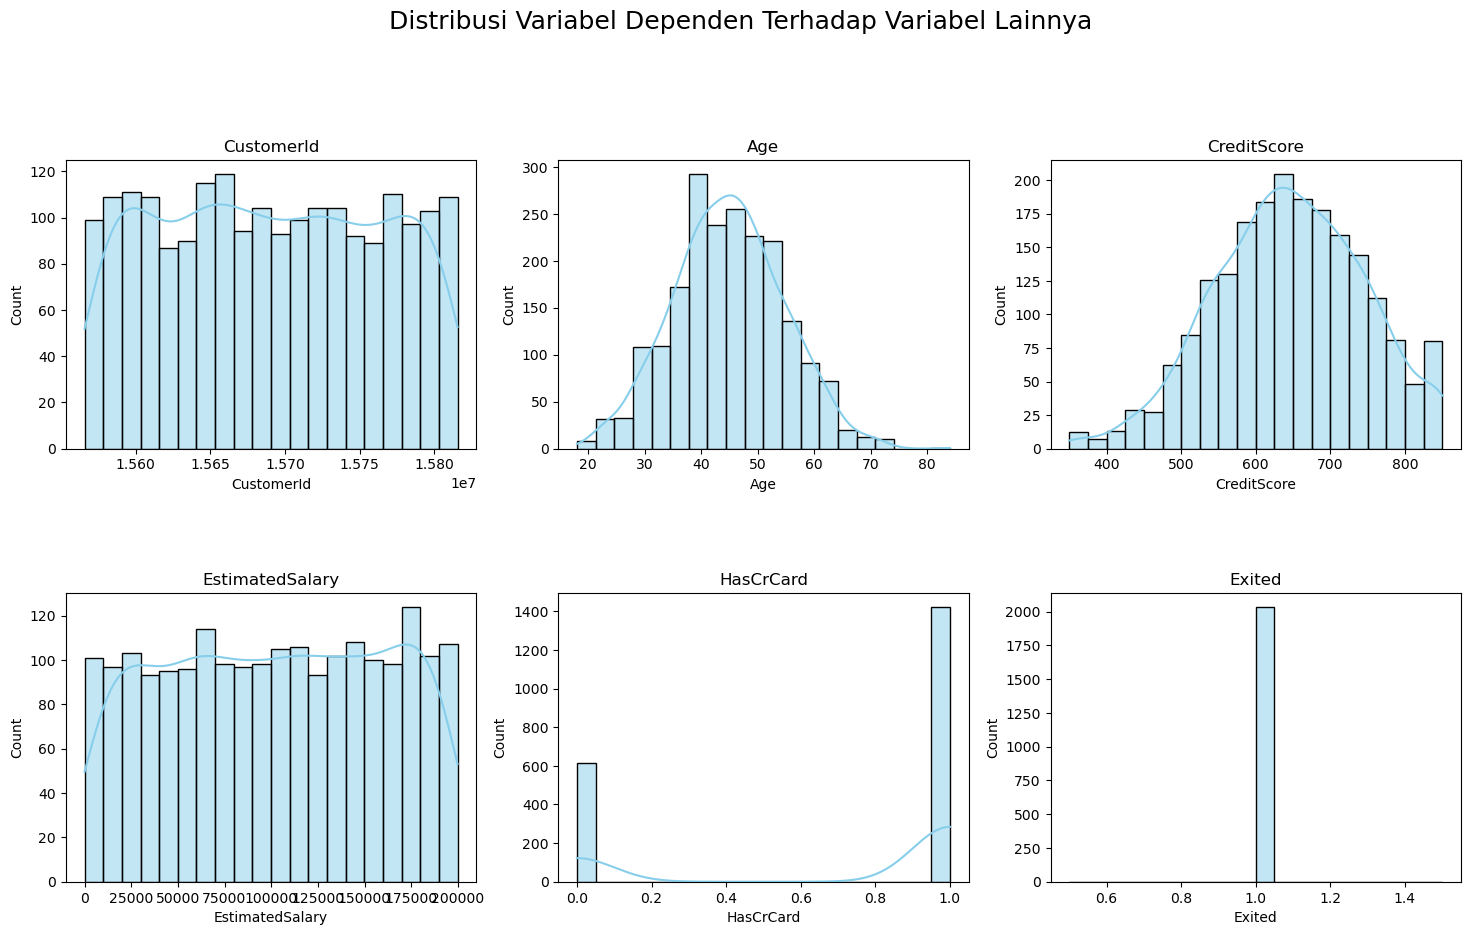

In [11]:
# Menampilkan distribusi variabel dependen terhadap variabel lainnya
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_dependent_var = df[df['Exited']==1]
df_num_cols = df_dependent_var.select_dtypes(include=numerics)
columns = df_num_cols.columns[:len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)
fig.suptitle('Distribusi Variabel Dependen Terhadap Variabel Lainnya', fontsize=18)
plt.show()

1. **Variabel "CustomerId":**
- Distribusi variabel "CustomerId" menunjukkan bentuk plot yang seragam, dengan frekuensi yang relatif stabil di setiap bin edge.

2. **Variabel "Age":**
- Distribusi variabel "Age" menunjukkan bentuk plot yang normal dengan sedikit right-skewed.
- Mayoritas data berada dalam rentang usia '36-50'.

3. **Variabel "CreditScore":**
- Distribusi variabel "CreditScore" memiliki bentuk plot yang normal, namun sedikit left-skewed.

4. **Variabel "EstimatedSalary":**
- Distribusi variabel "EstimatedSalary" menunjukkan bentuk plot yang seragam, dengan frekuensi yang relatif stabil di setiap bin edge.

5. **Variabel "HasCrCard":**
- Distribusi variabel "HasCrCard" menunjukkan bahwa mayoritas data berada pada kategori pemegang kartu kredit (HasCrCard=1).
- Pemegang kartu kredit (HasCrCard=1) memiliki jumlah frekuensi "Exited" yang lebih tinggi dibandingkan dengan yang bukan pemegang kartu kredit (HasCrCard=0).

6. **Variabel "Exited":**
- Dalam plot distribusi variabel "Exited", tidak ditampilkan frekuensi yang berkaitan dengan pelanggan yang tidak keluar dari layanan ("Exited"=0), dan fokusnya adalah pada pelanggan yang telah keluar ("Exited"=1).

### 2.2.9 Korelasi antar Variabel

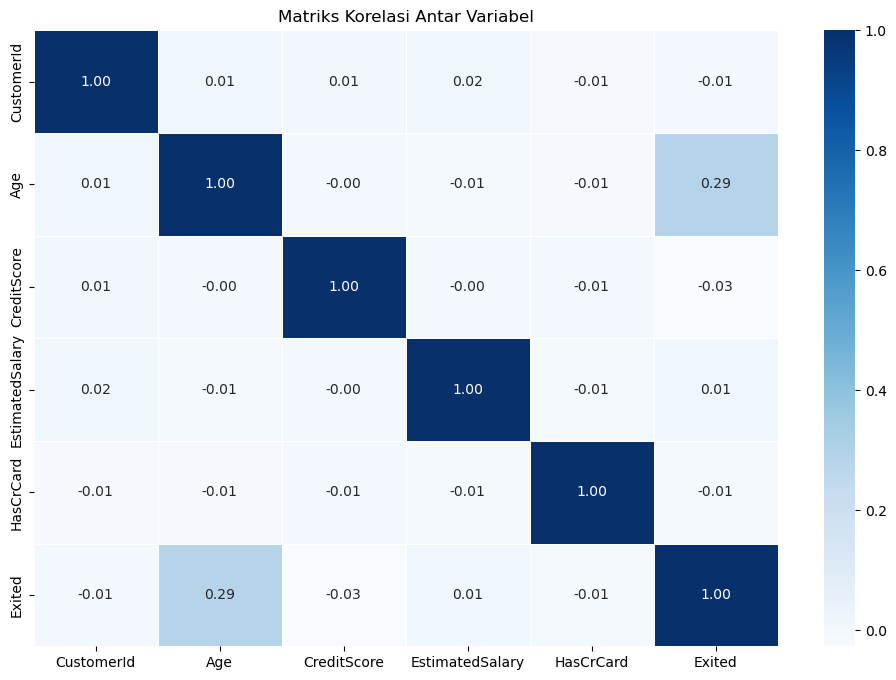

In [15]:
# Matriks korelasi
correlation_matrix = df.corr(numeric_only=True)

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

1. **Korelasi antara Umur (Age) dan Exited:**
- Korelasi positif sebesar 0.36 menunjukkan bahwa ada hubungan yang moderat antara usia nasabah dan kecenderungan untuk keluar dari layanan.
- Ini dapat diartikan bahwa semakin tua seseorang, semakin cenderung mereka bertahan dalam layanan.

2. **Korelasi antara Jenis Kelamin (Gender) dan Exited:**
- Korelasi negatif sebesar -0.31 menunjukkan bahwa terdapat hubungan cukup negatif antara jenis kelamin (laki-laki) dan kecenderungan untuk keluar dari layanan.
- Hal ini dapat diartikan bahwa nasabah perempuan mungkin cenderung lebih loyal terhadap layanan dibandingkan dengan nasabah laki-laki.

3. **Korelasi antara Kepemilikan Kartu Kredit (HasCrCard) dan Exited:**
- Korelasi negatif sebesar -0.17 menunjukkan bahwa kepemilikan kartu kredit memiliki pengaruh cukup negatif terhadap kecenderungan keluar dari layanan.
- Artinya, nasabah yang memiliki kartu kredit cenderung lebih setia terhadap layanan.

4. **Korelasi antara Skor Kredit (CreditScore) dan Exited:**
- Korelasi negatif sebesar -0.04 menunjukkan bahwa terdapat hubungan yang kurang kuat antara skor kredit dan kecenderungan keluar dari layanan.
- Hal ini mungkin menandakan bahwa nasabah dengan skor kredit yang lebih tinggi memiliki kecenderungan yang sedikit lebih rendah untuk keluar dari layanan.

5. **Korelasi antara Estimasi Pendapatan (EstimatedSalary) dan Exited:**
- Korelasi positif yang sangat lemah (0.0075) menunjukkan bahwa tidak ada korelasi yang signifikan antara estimasi pendapatan dan kecenderungan keluar dari layanan.
- Dengan kata lain, estimasi pendapatan tidak menjadi faktor utama yang mempengaruhi keputusan nasabah untuk keluar dari layanan.

6. **Korelasi antara Kepemilikan Kartu Kredit (HasCrCard) dan Jenis Kelamin (Gender):**
- Korelasi positif sebesar 0.078 menunjukkan bahwa ada hubungan positif yang kurang kuat antara kepemilikan kartu kredit dan jenis kelamin laki-laki.
- Artinya, laki-laki mungkin sedikit lebih mungkin memiliki kartu kredit.

## 2.3 Pra-Pemrosesan Data

### 2.3.1 Mempersiapkan data

In [16]:
#Mempersiapkan data
def data_prepare(df):
    df_prep = df.copy()

    # Encode variabel kategorikal
    df_prep = pd.get_dummies(df_prep, columns=['Gender'], drop_first=True)

    # Handle imbalance data menggunakan SMOTE
    smote = SMOTE(sampling_strategy='auto')
    X_smote, y_smote = smote.fit_resample(df_prep.drop('Exited', axis=1), df_prep['Exited'])

    # Menggabungkan hasil oversampling ke dalam DataFrame
    df_prep = pd.concat([pd.DataFrame(X_smote, columns=df_prep.drop('Exited', axis=1).columns), pd.Series(y_smote, name='Exited')], axis=1)

    return df_prep

# Menyimpan DataFrame yang telah dipersiapkan
df = data_prepare(df)

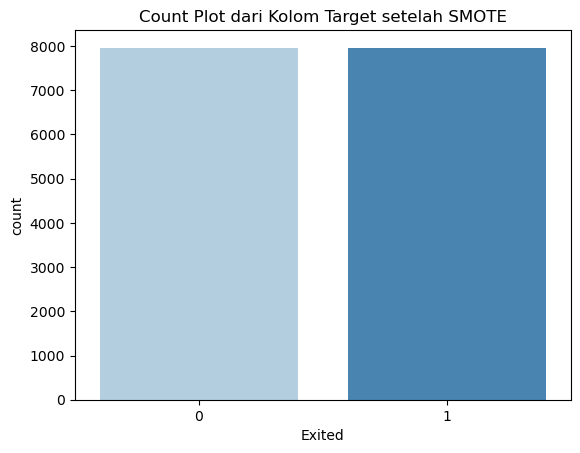

In [17]:
# Count plot dari kolom target setelah SMOTE
sns.countplot(x='Exited', data=df, palette='Blues')
plt.title('Count Plot dari Kolom Target setelah SMOTE')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Distribusi variabel dependen terhadap beberapa variabel independen setelah SMOTE:
Exited 0 count: 7963
Exited 1 count: 7963


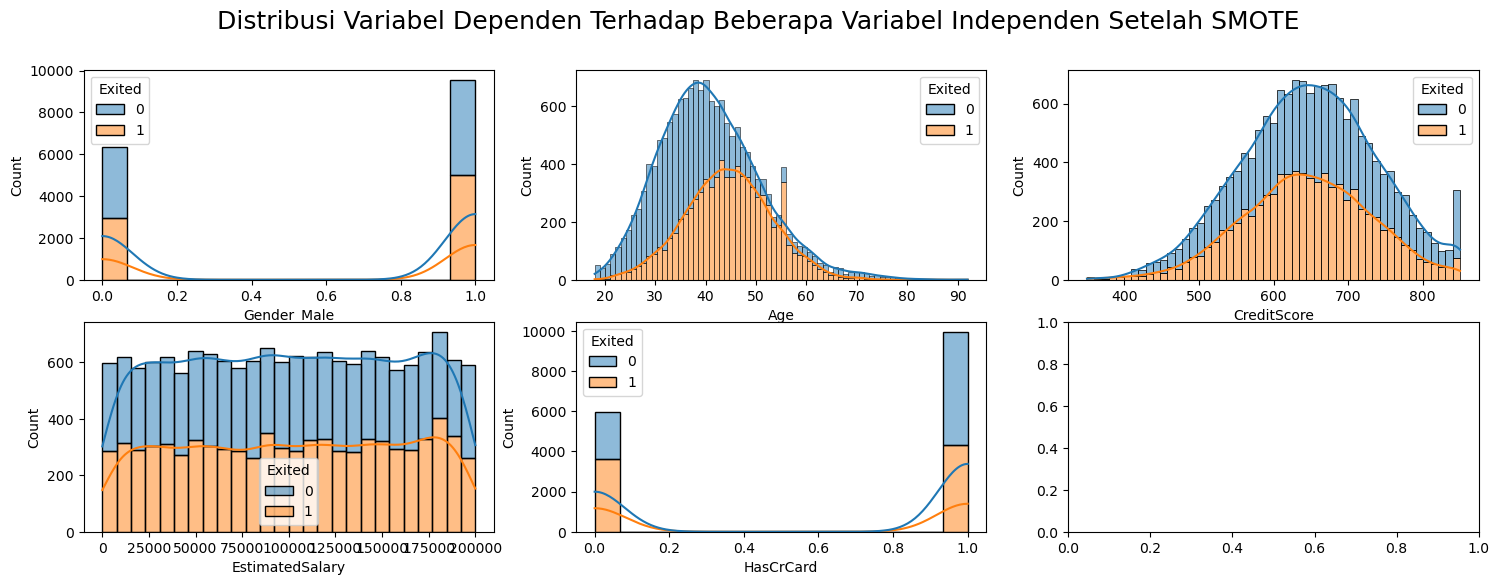

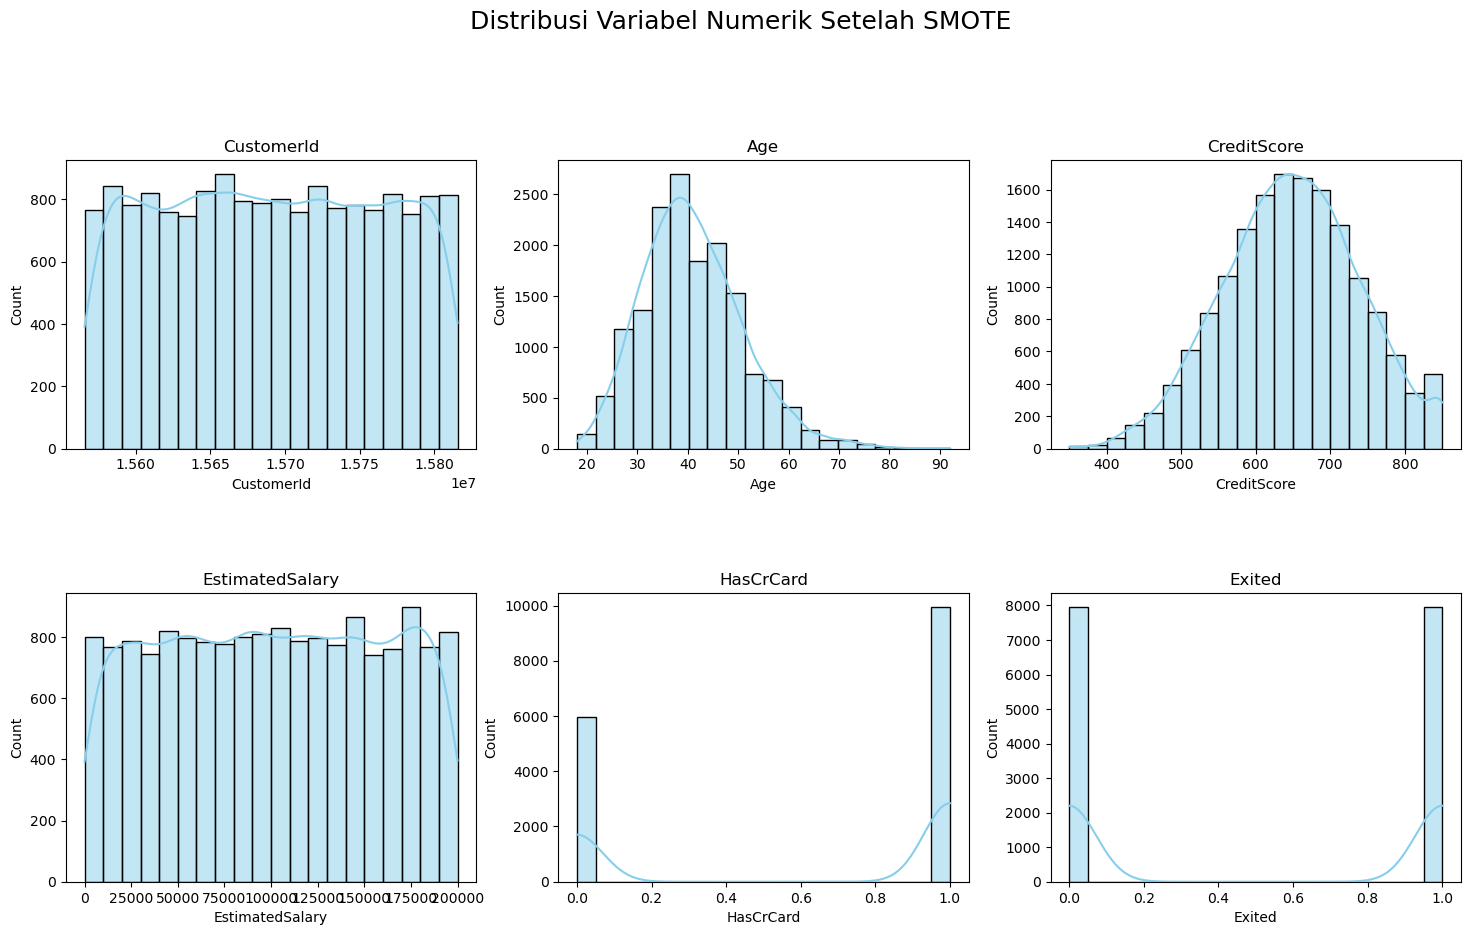

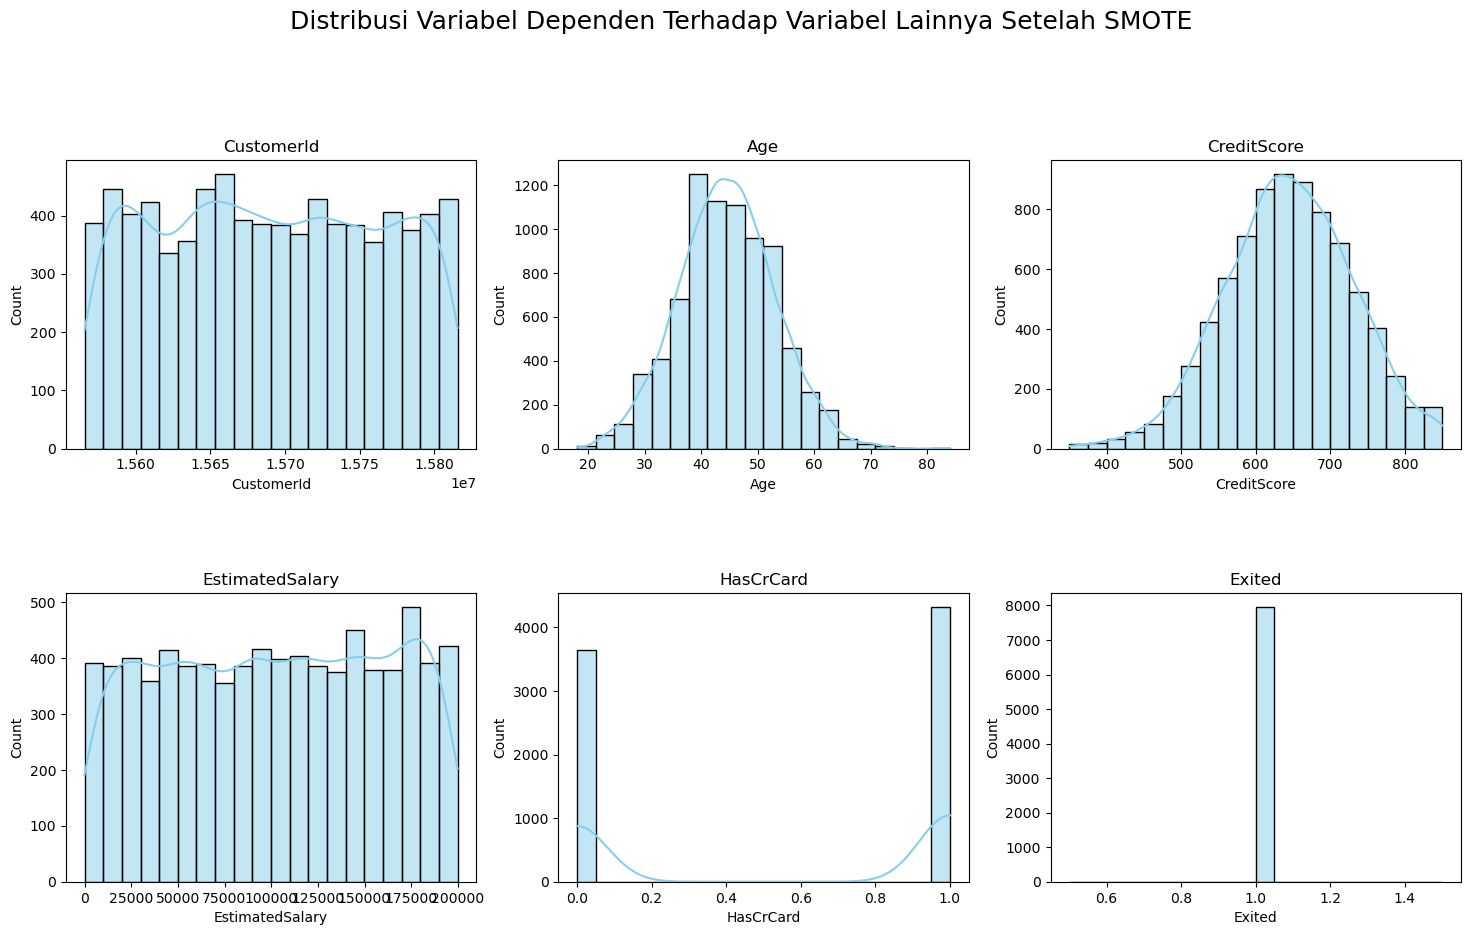

In [18]:
# 1
# Menampilkan distribusi variabel dependen terhadap beberapa variabel independen
fig, axarr = plt.subplots(2, 3, figsize=(18, 6))

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Gender_Male'
sns.histplot(x='Gender_Male', hue='Exited', data=df, ax=axarr[0, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'Age'
sns.histplot(x='Age', hue='Exited', data=df, ax=axarr[0, 1], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'CreditScore'
sns.histplot(x='CreditScore', hue='Exited', data=df, ax=axarr[0, 2], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'EstimatedSalary'
sns.histplot(x='EstimatedSalary', hue='Exited', data=df, ax=axarr[1, 0], multiple='stack', kde=True)

# Menampilkan distribusi variabel dependen 'Exited' terhadap variabel independen 'HasCrCard'
sns.histplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1, 1], multiple='stack', kde=True)

# Menghitung jumlah nilai 0 (tidak Exited) dan nilai 1 (Exited) pada variabel dependen 'Exited'
zero_count, one_count = df['Exited'].value_counts()
print("Distribusi variabel dependen terhadap beberapa variabel independen setelah SMOTE:")
print("Exited 0 count:", zero_count)
print("Exited 1 count:", one_count)

fig.suptitle('Distribusi Variabel Dependen Terhadap Beberapa Variabel Independen Setelah SMOTE', fontsize=18)

# Menampilkan plot
plt.show()

# 2
# Menampilkan distribusi variabel numerik dalam DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num_cols = df.select_dtypes(include=numerics)
columns = df_num_cols.columns[: len(df_num_cols.columns)]

fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)

for i, j in zip(columns, range(length)):
    plt.subplot(int(length / 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)

fig.suptitle('Distribusi Variabel Numerik Setelah SMOTE', fontsize=18)
plt.show()

# 3
# Menampilkan distribusi variabel dependen terhadap variabel lainnya
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_dependent_var = df[df['Exited']==1]
df_num_cols = df_dependent_var.select_dtypes(include=numerics)
columns = df_num_cols.columns[:len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 15)
length = len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot(int(length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    sns.histplot(df_num_cols[i], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(i)
fig.suptitle('Distribusi Variabel Dependen Terhadap Variabel Lainnya Setelah SMOTE', fontsize=18)
plt.show()

1. **Gender:**
- Sebelum SMOTE, Female memiliki jumlah yang lebih rendah pada kategori '1' (Exited) dibandingkan dengan Male.
- Setelah SMOTE, perbedaan jumlah antara Female dan Male pada kategori '1' (Exited) menurun, tetapi masih terdapat perbedaan signifikan.

2. **Age:**
- Sebelum SMOTE, kategori umur '19-35' memiliki jumlah Exited yang lebih tinggi dibandingkan dengan '0-18'.
- Setelah SMOTE, terdapat peningkatan jumlah Exited pada kategori '0-18', namun kategori '19-35' masih memiliki jumlah Exited yang tinggi.

3. **CreditScore:**
- Sebelum SMOTE, skor kredit di bawah rata-rata memiliki jumlah Exited yang lebih rendah dibandingkan dengan skor kredit di atas rata-rata.
- Setelah SMOTE, perbedaan jumlah Exited antara skor kredit di bawah rata-rata dan skor kredit di atas rata-rata menurun, tetapi skor kredit di bawah rata-rata masih memiliki jumlah Exited yang lebih rendah.

4. **EstimatedSalary:**
- Sebelum SMOTE, kategori pendapatan di bawah rata-rata dan di atas rata-rata memiliki jumlah Exited yang cukup seimbang.
- Setelah SMOTE, perbedaan jumlah Exited antara kategori pendapatan di bawah rata-rata dan di atas rata-rata tetap seimbang.

5. **HasCrCard:**
- Sebelum SMOTE, terdapat perbedaan yang signifikan antara pemegang kartu kredit (HasCrCard=1) dan bukan pemegang kartu kredit (HasCrCard=0) dalam hal jumlah Exited.
- Setelah SMOTE, perbedaan jumlah Exited antara pemegang kartu kredit dan bukan pemegang kartu kredit menurun, tetapi pemegang kartu kredit (HasCrCard=1) masih memiliki jumlah Exited yang lebih tinggi.

SMOTE berhasil menyeimbangkan jumlah sampel antara kelas Exited (1) dan kelas Not Exited (0), mengurangi ketidakseimbangan kelas yang dapat memengaruhi kinerja model klasifikasi.

### 2.3.2 Handling Missing Values

In [19]:
def process_and_display_data(df):
    # Menangani nilai yang hilang
    missing_values = df.isnull().sum()

    # Memeriksa missing values
    print("Jumlah missing values:")
    print(missing_values)
    print("\n")

    show_unique_count_variables(df)

    return df

df = process_and_display_data(df)

Jumlah missing values:
CustomerId         0
Age                0
CreditScore        0
EstimatedSalary    0
HasCrCard          0
Gender_Male        0
Exited             0
dtype: int64



Jumlah nilai unik:
CustomerId         15614
Age                   70
CreditScore          474
EstimatedSalary    15925
HasCrCard              2
Gender_Male            2
Exited                 2
dtype: int64


### 2.3.3 Handling Outliers

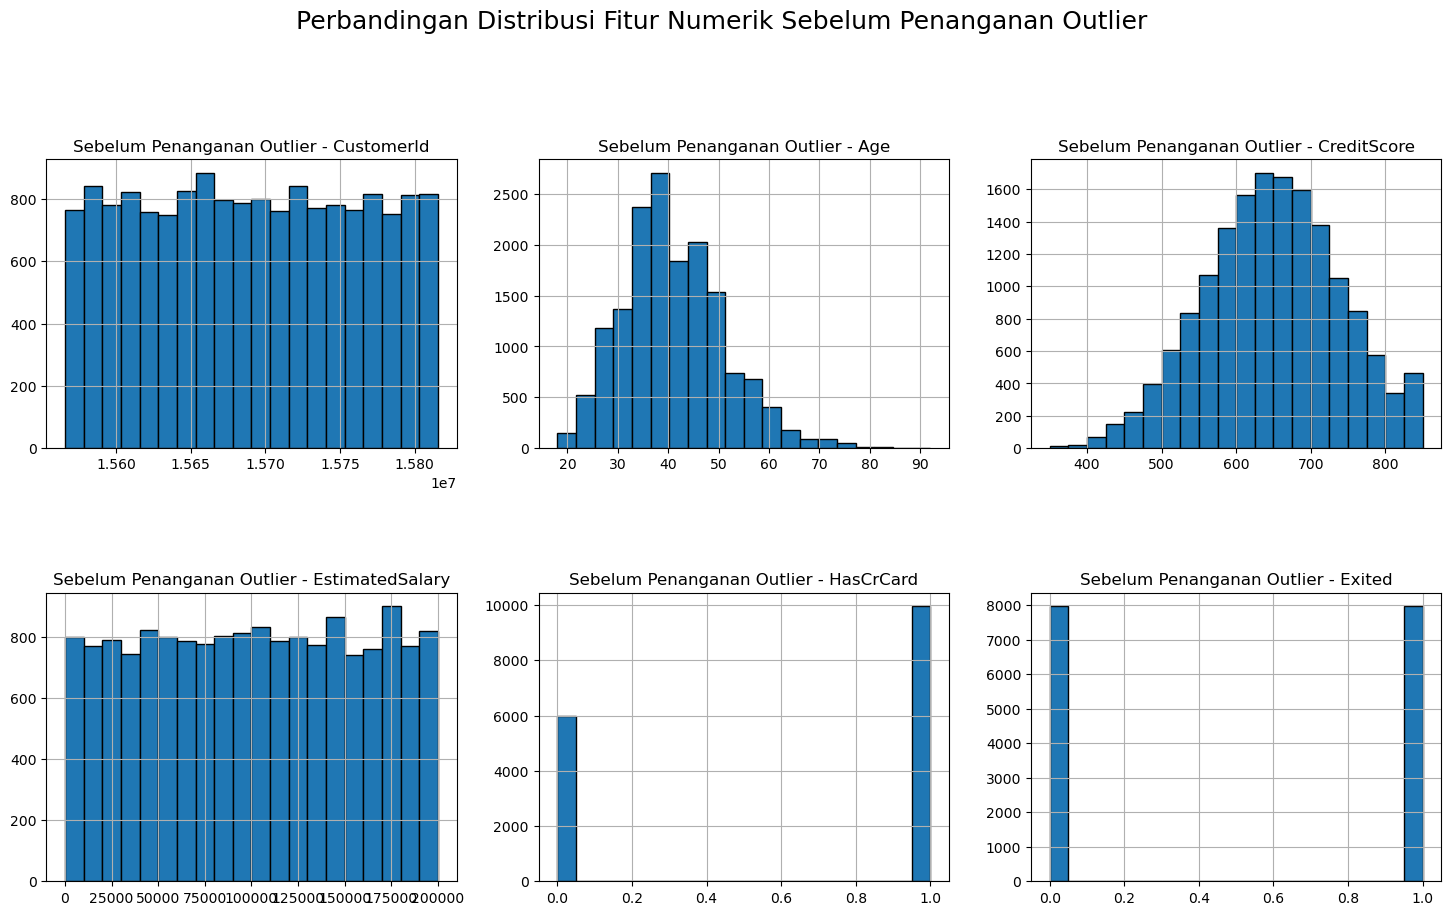

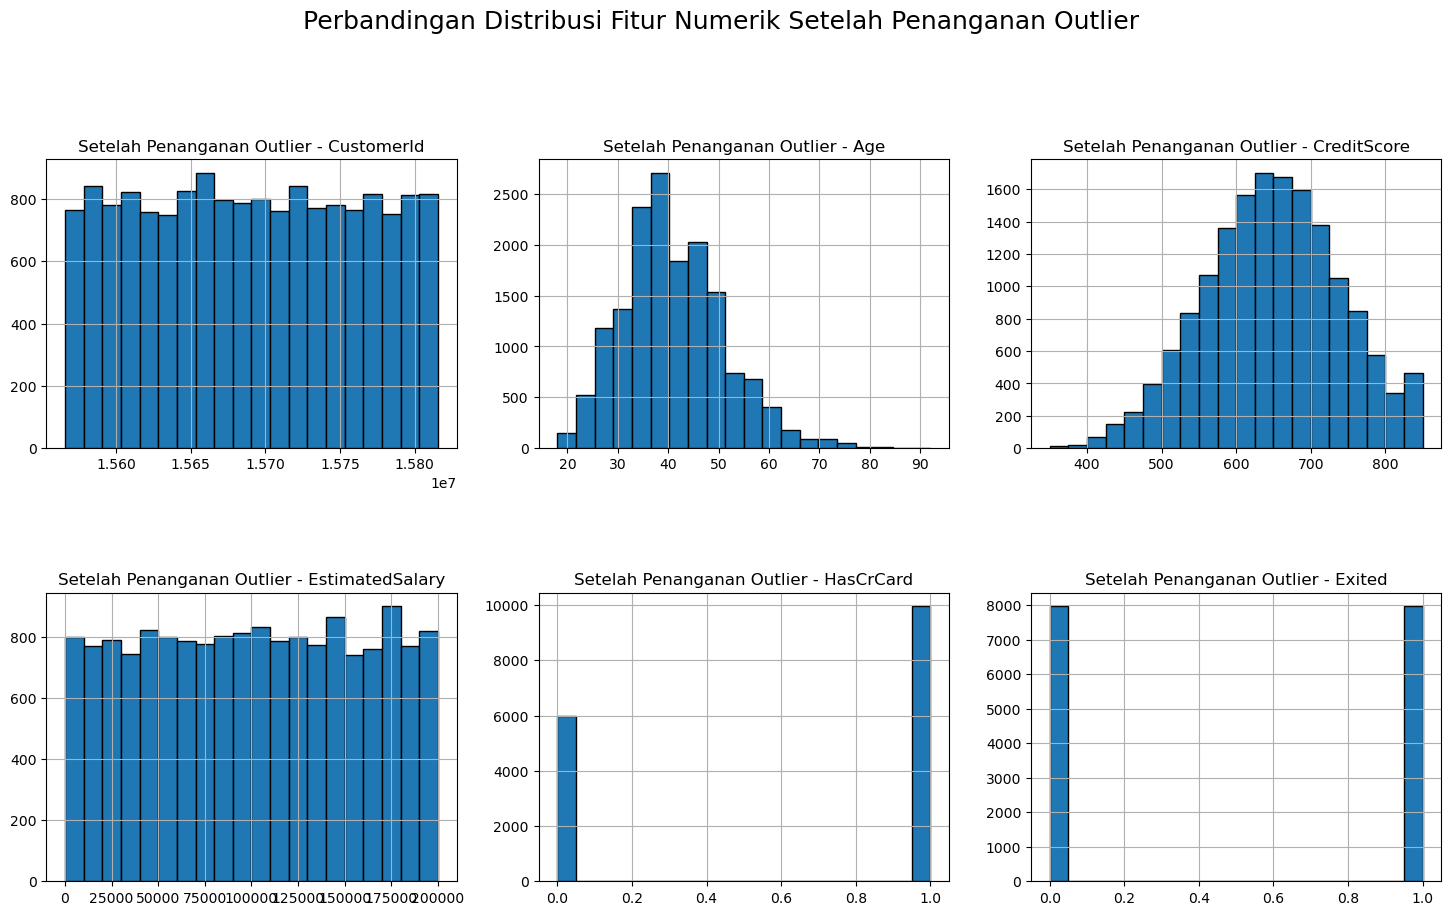

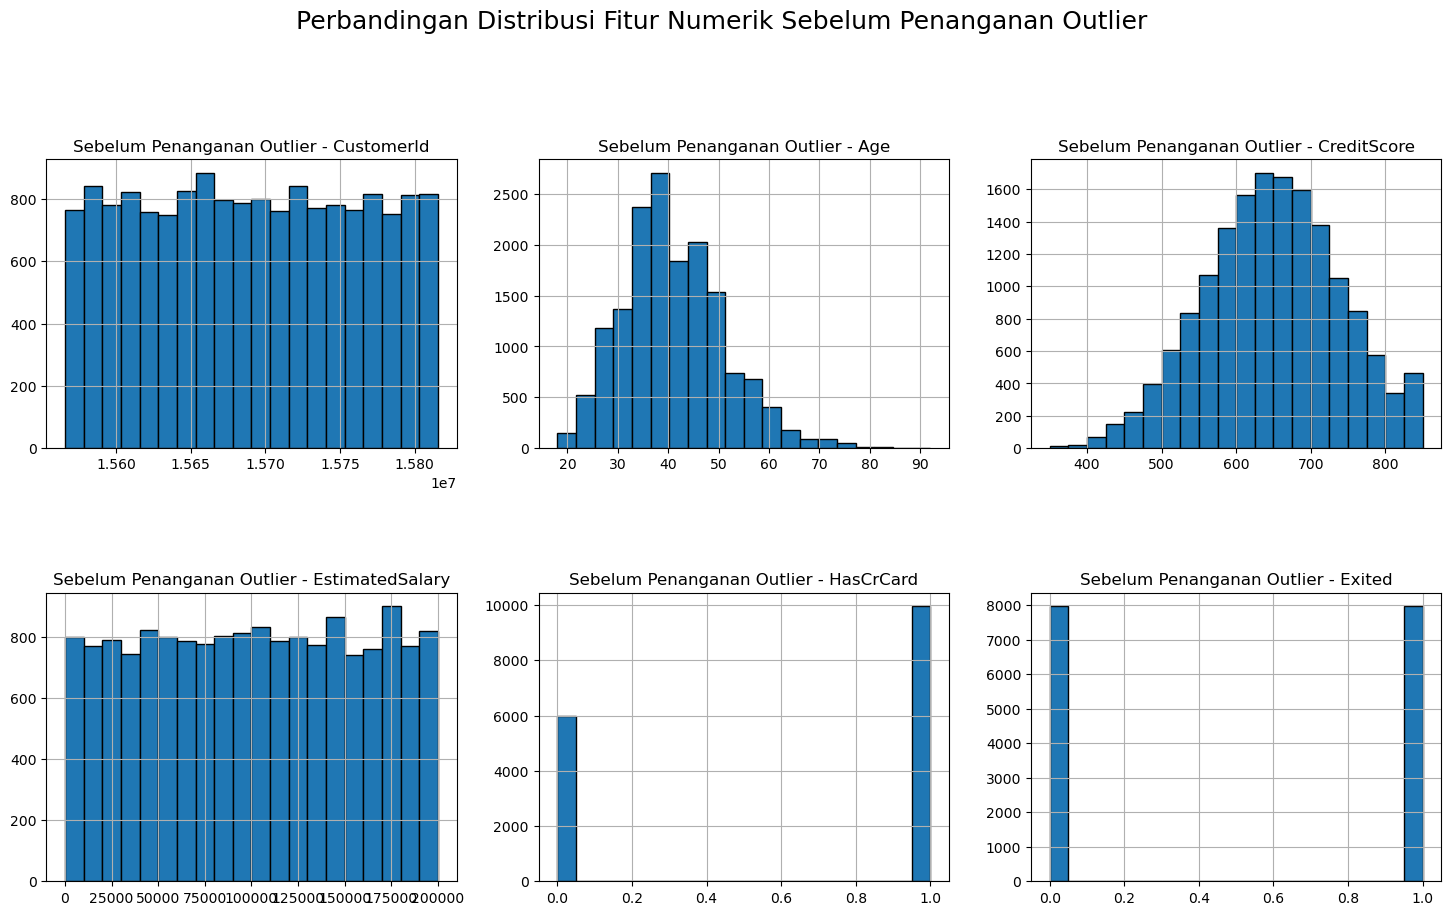

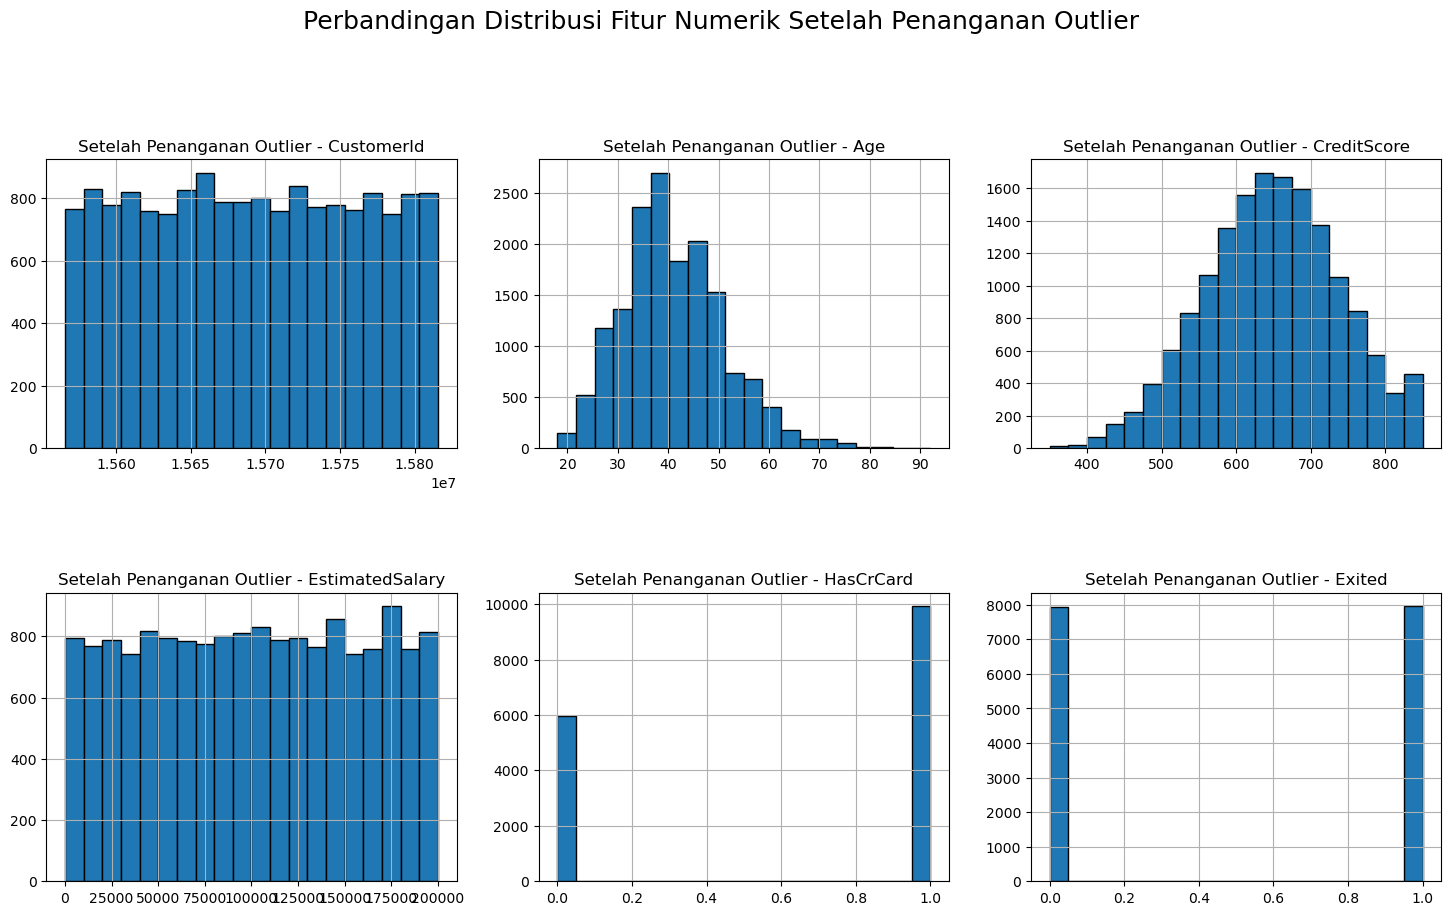

In [20]:
def handle_outliers(df):
    # Mendeteksi outlier menggunakan metode Local Outlier Factor (LOF)
    lof = LocalOutlierFactor()
    outliers = lof.fit_predict(df.drop('Exited', axis=1))
    df_no_outliers = df.loc[outliers != -1]
    return df_no_outliers

def plot_outlier_comparison(df_before, df_after):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    # Memilih kolom numerik dari dataframe sebelumnya
    df_num_cols_before = df_before.select_dtypes(include=numerics)
    columns_before = df_num_cols_before.columns[:len(df_num_cols_before.columns)]

    fig_before = plt.figure()
    fig_before.set_size_inches(18, 15)
    length_before = len(columns_before)

    for i, j in zip(columns_before, range(length_before)):
        plt.subplot(int(length_before / 2), 3, j + 1)
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        df_num_cols_before[i].hist(bins=20, edgecolor='black')
        plt.title(f'Sebelum Penanganan Outlier - {i}')

    fig_before.suptitle('Perbandingan Distribusi Fitur Numerik Sebelum Penanganan Outlier', fontsize=18)
    plt.show()

    # Memilih kolom numerik dari dataframe setelah penanganan outlier
    df_num_cols_after = df_after.select_dtypes(include=numerics)
    columns_after = df_num_cols_after.columns[:len(df_num_cols_after.columns)]

    fig_after = plt.figure()
    fig_after.set_size_inches(18, 15)
    length_after = len(columns_after)

    for i, j in zip(columns_after, range(length_after)):
        plt.subplot(int(length_after / 2), 3, j + 1)
        plt.subplots_adjust(wspace=0.2, hspace=0.5)
        df_num_cols_after[i].hist(bins=20, edgecolor='black')
        plt.title(f'Setelah Penanganan Outlier - {i}')

    fig_after.suptitle('Perbandingan Distribusi Fitur Numerik Setelah Penanganan Outlier', fontsize=18)
    plt.show()

# Muat dataframe 'df' di sini

# Sebelum penanganan outlier
plot_outlier_comparison(df, df)

# Setelah penanganan outlier
df_no_outliers = handle_outliers(df)
plot_outlier_comparison(df, df_no_outliers)

1. **Jumlah Baris:**
- Sebelum handling outlier, jumlah baris (CustomerId) adalah 15581, sedangkan setelah menggunakan LOF, jumlah baris berkurang menjadi 15558.
- Hal ini menunjukkan bahwa ada beberapa baris yang diidentifikasi sebagai outlier dan dihapus dari dataset.

2. **EstimatedSalary:**
- Sebelum handling outlier, jumlah nilai unik pada variabel EstimatedSalary adalah 15925, dan setelah menggunakan LOF, nilai ini berkurang menjadi 15902.
- Hal ini menunjukkan bahwa ada beberapa nilai yang dianggap sebagai outlier pada variabel EstimatedSalary.

3. **Konsistensi pada Variabel Lain:**
- Variabel lain seperti Age, CreditScore, HasCrCard, Gender_Male, dan Exited tidak mengalami perubahan signifikan dalam jumlah nilai unik setelah handling outlier.
- Hal ini menunjukkan bahwa LOF lebih fokus pada identifikasi outlier pada variabel tertentu (dalam hal ini, EstimatedSalary).

# 3. Model Training

PIC : Timmy, Eko

## 3.1 Splitting & Scaling Data

In [21]:
def model_prepare(df_model):
    y = df_model[dependent_variable_name]
    X = df_model.loc[:, df_model.columns != dependent_variable_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform (X_test)
    return X_train, X_test, y_train, y_test

## 3.2 Model Training

In [22]:
def data_training(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LOGR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GBM', GradientBoostingClassifier()))
    models.append(('XGBoost', XGBClassifier()))
    models.append(('LightGBM', LGBMClassifier()))
    models.append(('SVM', SVC()))
    models.append(('AdaBoost', AdaBoostClassifier()))

    res_cols = ["model", "accuracy_score", "0_precision", "0_recall", "1_precision", "1_recall"]
    df_result = pd.DataFrame(columns=res_cols)
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, digits=2, output_dict=True)
        zero_report = class_report['0']
        one_report = class_report['1']

        idx_res_values = [name, score, zero_report['precision'], zero_report['recall'], one_report['precision'], one_report['recall']]
        # df_result.at[index, res_cols] = idx_res_values
        df_result.loc[index, res_cols] = idx_res_values
        index += 1
    return df_result.sort_values('accuracy_score', ascending=False)
    # df_result = df_result.sort_values("accuracy_score", ascending=False).reset_index(drop=True)
    # return df_result

In [23]:
# Model_prepare test, train split 0.2
X_train, X_test, y_train, y_test = model_prepare(df_model=df)

In [24]:
training_result = data_training(X_train, X_test, y_train, y_test)
training_result

[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559


,model,accuracy_score,0_precision,0_recall,1_precision,1_recall
3,RF,0.772756,0.793794,0.75199,0.752898,0.794591
5,XGBoost,0.760515,0.772898,0.75444,0.748116,0.766903
6,LightGBM,0.749215,0.759651,0.747091,0.738608,0.751449
7,SVM,0.727558,0.731959,0.73913,0.722837,0.71539
8,AdaBoost,0.725047,0.732351,0.730557,0.717405,0.719253
4,GBM,0.723478,0.73354,0.723209,0.713198,0.72376
0,LOGR,0.715631,0.721782,0.724434,0.709114,0.706375
1,KNN,0.712178,0.739946,0.676056,0.687721,0.750161
2,CART,0.708098,0.726045,0.691366,0.690987,0.725692


## 3.2.1 | Logistic Regression

Training Accuracy: 0.702276295133438
Validation Accuracy: 0.7156308851224106


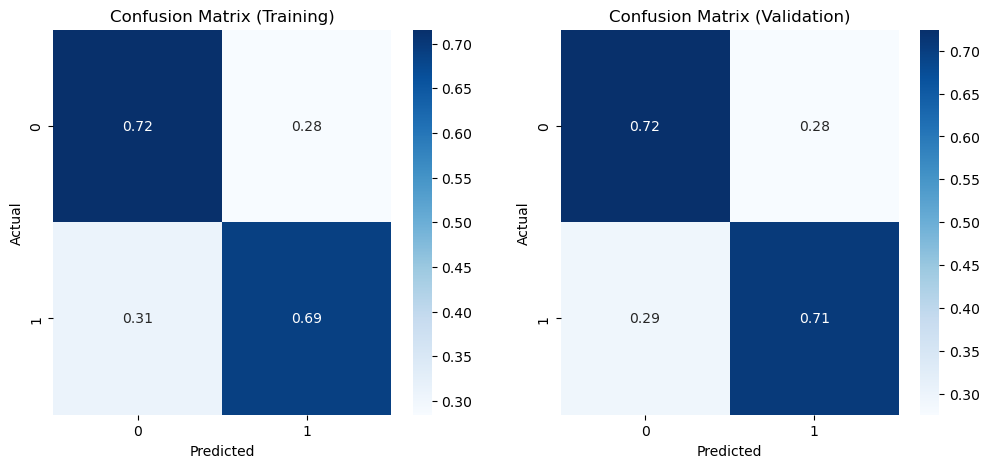

In [25]:
# Create the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = log_reg_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = log_reg_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.2"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning of Logistic Regression </b></span>

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_l

Training Accuracy: 0.702276295133438
Validation Accuracy: 0.7156308851224106


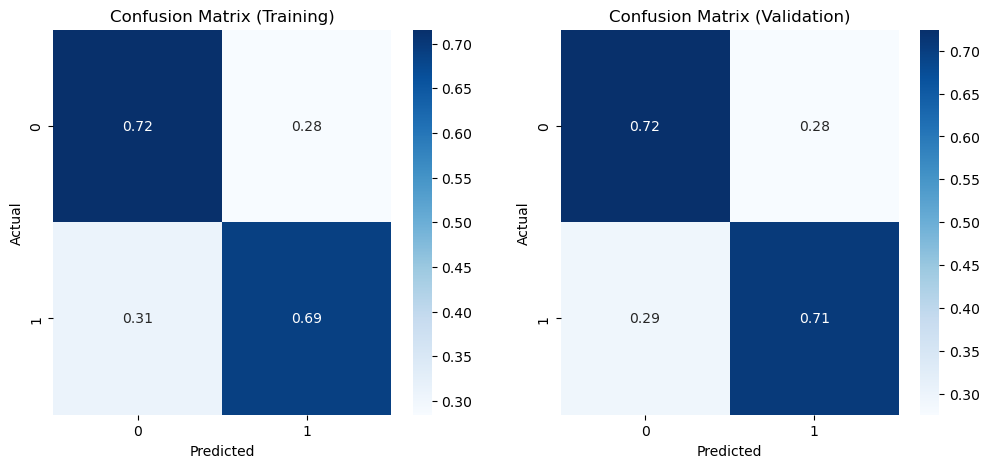

In [26]:
# Define the hyperparameter grid to search
param_grid = {'solver': ['lbfgs', 'sag', 'saga', 'liblinear'],
              'penalty': ['l1', 'l2'],
              'C': [100, 10, 1]}

# Create the Logistic Regression model
log_reg_model = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.2 | KNN

Training Accuracy: 0.8143642072213501
Validation Accuracy: 0.7121782799748901


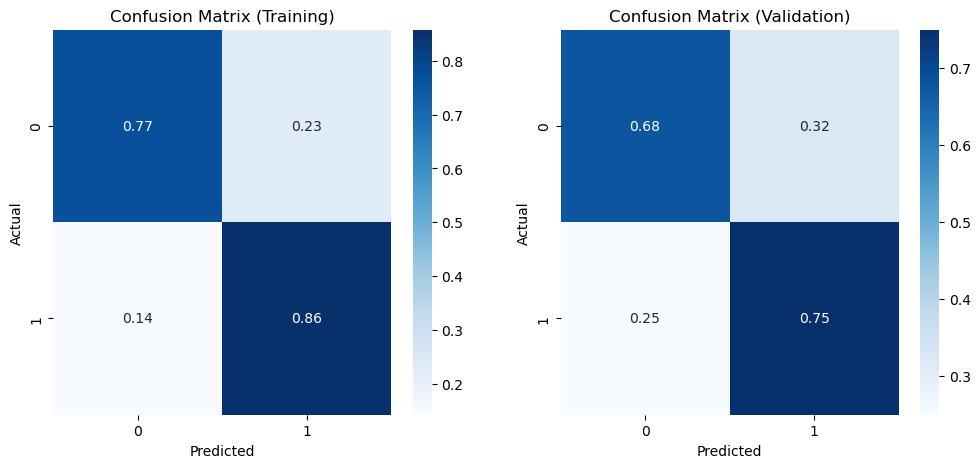

In [27]:
# Create the KNN classifier model (you can adjust the number of neighbors 'n_neighbors')
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = knn_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = knn_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.2"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning of KNN </b></span>

Training Accuracy: 0.7740973312401884
Validation Accuracy: 0.7259887005649718


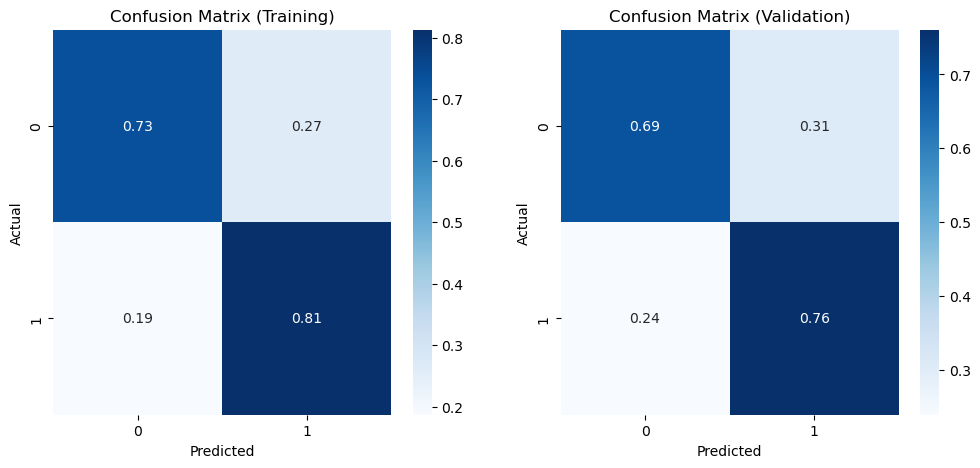

In [28]:
# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Adjust the number of neighbors to explore
}

# Create the KNN classifier model
knn_model = KNeighborsClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the training data using the best model
y_train_pred = best_model.predict(X_train)

# Make predictions on the validation data using the best model
y_test_pred = best_model.predict(X_test)

# Calculate the training and validation accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.3 | Decision Tree

Training Accuracy: 1.0
Validation Accuracy: 0.7055869428750785


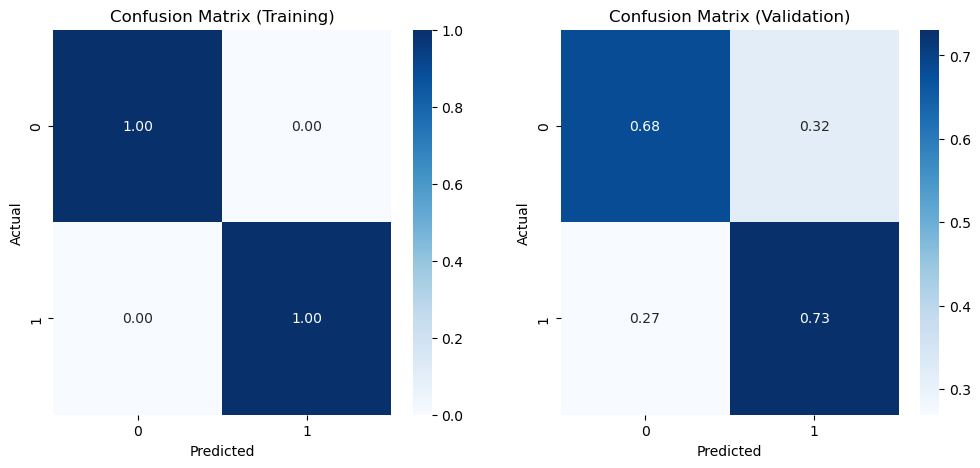

In [29]:
# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = decision_tree_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = decision_tree_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.3"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b> Hyperparameter Tuning Of Decision Tree </b></span>

Training Accuracy: 0.7774725274725275
Validation Accuracy: 0.7172002510985562


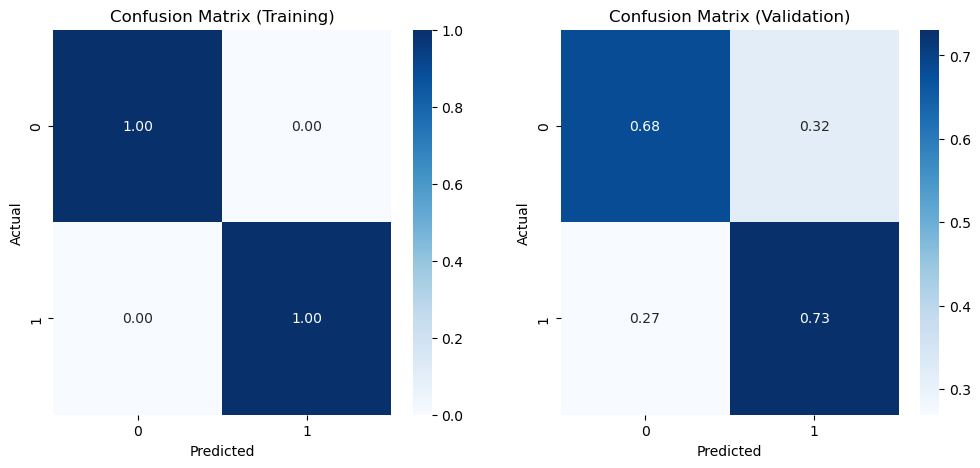

In [30]:
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the final model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.4 | Random Forest

Training Accuracy: 1.0
Validation Accuracy: 0.7658505963590709


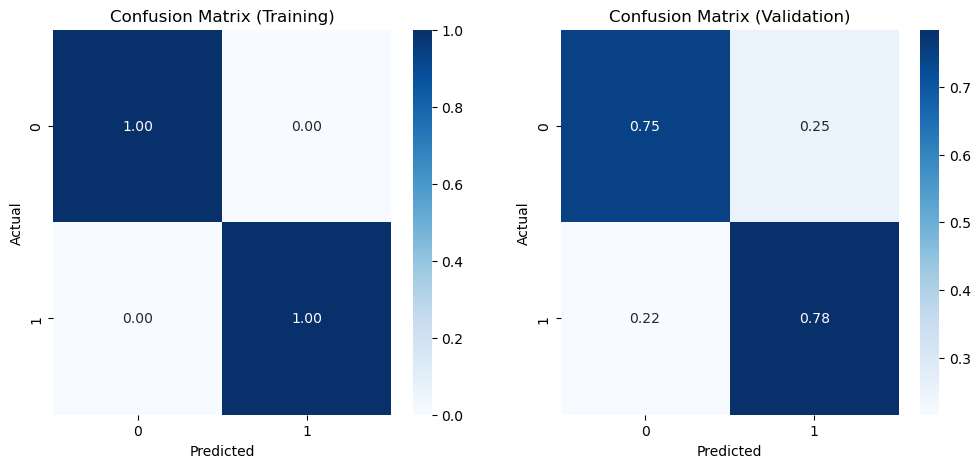

In [31]:
# Create the Random Forest model
random_forest_model = RandomForestClassifier()

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = random_forest_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = random_forest_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.4"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of Random Forest </b></span>

Training Accuracy: 0.9970957613814757
Validation Accuracy: 0.7721280602636534


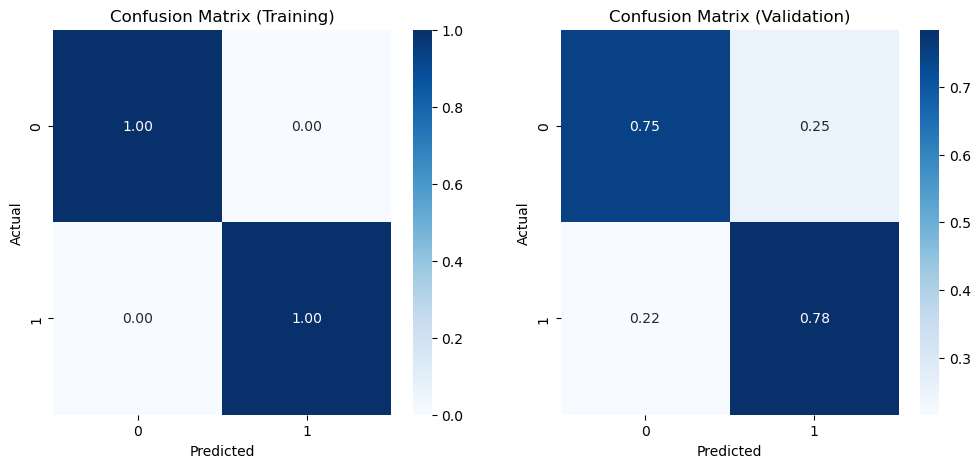

In [32]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

# Create the Random Forest model
random_forest_model = RandomForestClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.5 | Support Vector Classifier

Training Accuracy: 0.7295918367346939
Validation Accuracy: 0.7275580665411174


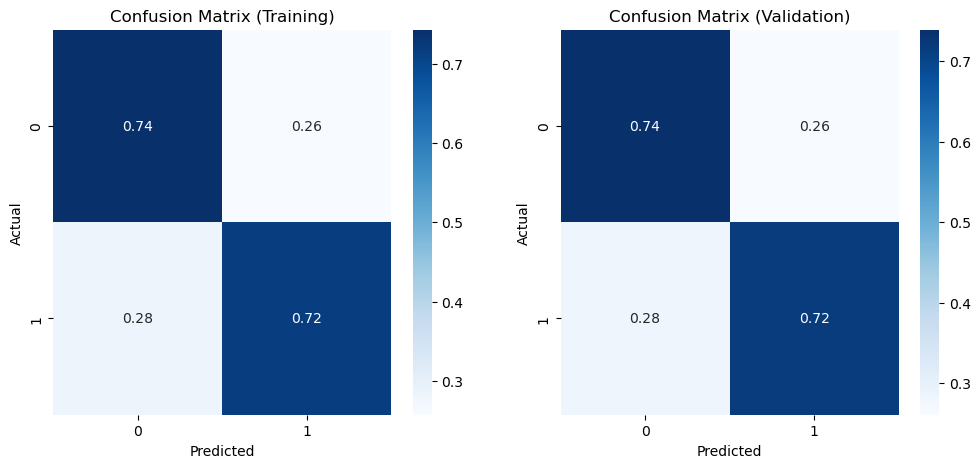

In [33]:
# Create the SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = svm_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of SVC</b></span>

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Training Accuracy: 0.7700156985871272
Validation Accuracy: 0.7372881355932204


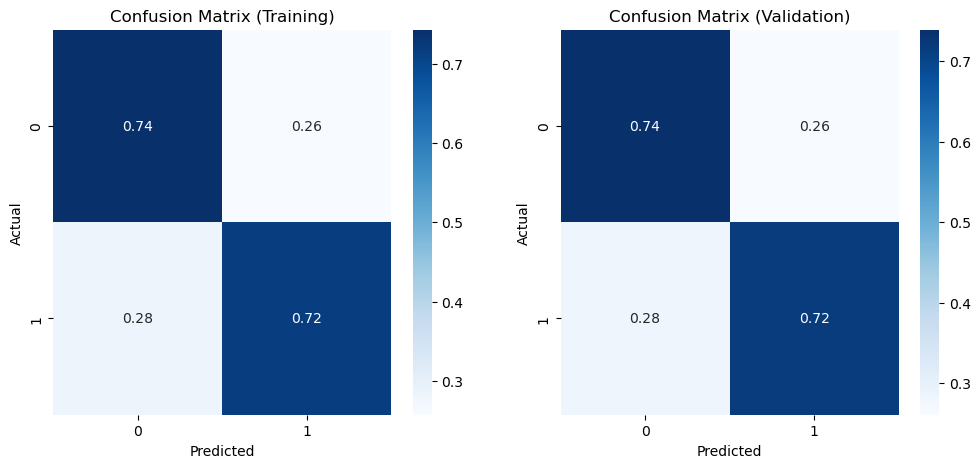

In [34]:
# Define the hyperparameter grid to search
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']
              }

# Create the SVM model
svm_model = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy', refit = True, verbose = 3)
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.6 | AdaBoost Classifier

Training Accuracy: 0.7244897959183674
Validation Accuracy: 0.7250470809792844


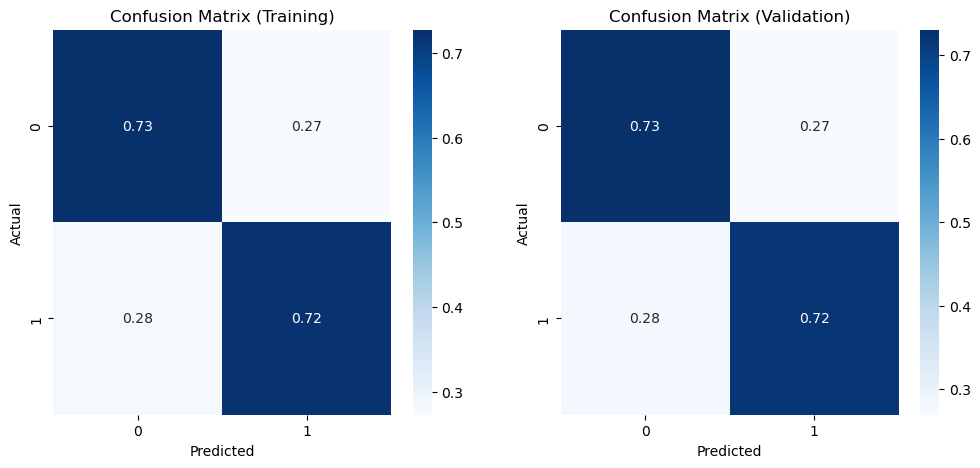

In [35]:
# Create the AdaBoost classifier model
adaboost_model = AdaBoostClassifier()

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = adaboost_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = adaboost_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of AdaBoost</b></span>

Training Accuracy: 0.7313971742543172
Validation Accuracy: 0.7256748273697426


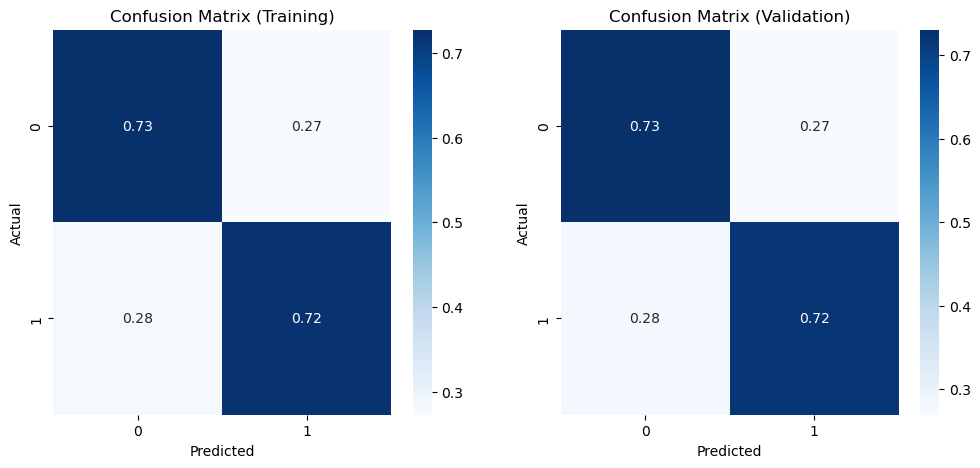

In [36]:
# Define the hyperparameter grid to search
param_grid = {'n_estimators': [100, 200, 300]}

# Create the AdaBoost classifier model
adaboost_model = AdaBoostClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.7 | Gradient Boosting Classifier

Training Accuracy: 0.7353218210361068
Validation Accuracy: 0.7237915881983679


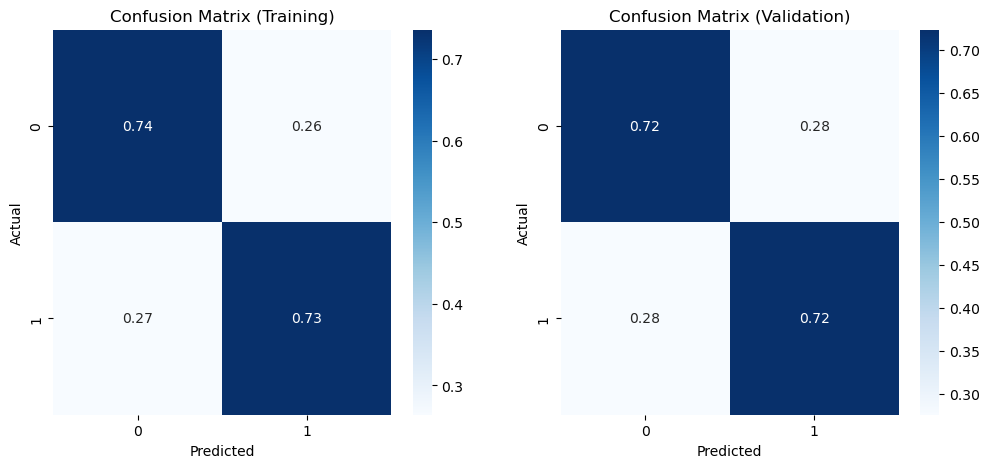

In [37]:
# Create the Gradient Boosting classifier model
gbm_model = GradientBoostingClassifier()

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = gbm_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = gbm_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of Gradient Boosting</b></span>

Training Accuracy: 0.9301412872841445
Validation Accuracy: 0.7658505963590709


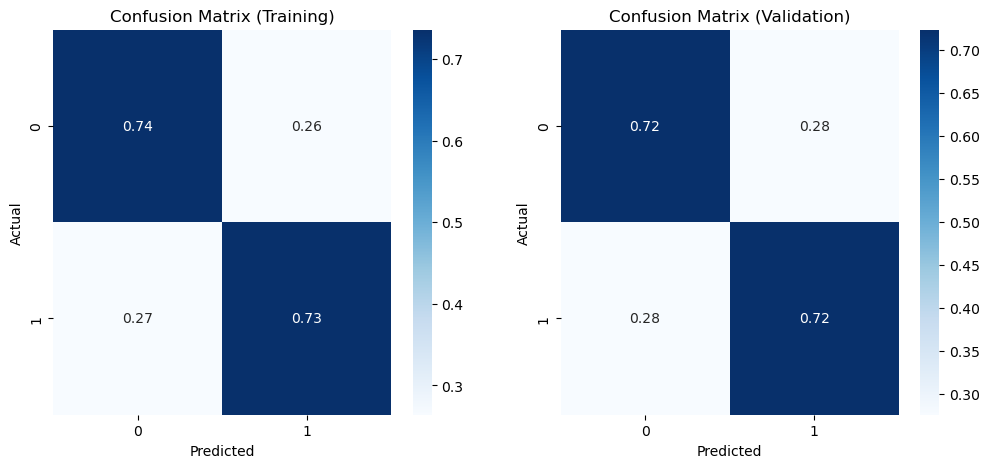

In [38]:
# Define the hyperparameter grid to search
param_grid = {
    "n_estimators":[50, 100, 200],
    "max_depth":[3, 5, 7],
    "learning_rate":[0.01, 0.1, 1]
}

# Create the Gradient Boosting classifier model
gbm_model = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gbm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

## 3.2.8 | XGBoost Classifier

Training Accuracy: 0.8735478806907379
Validation Accuracy: 0.7605147520401758


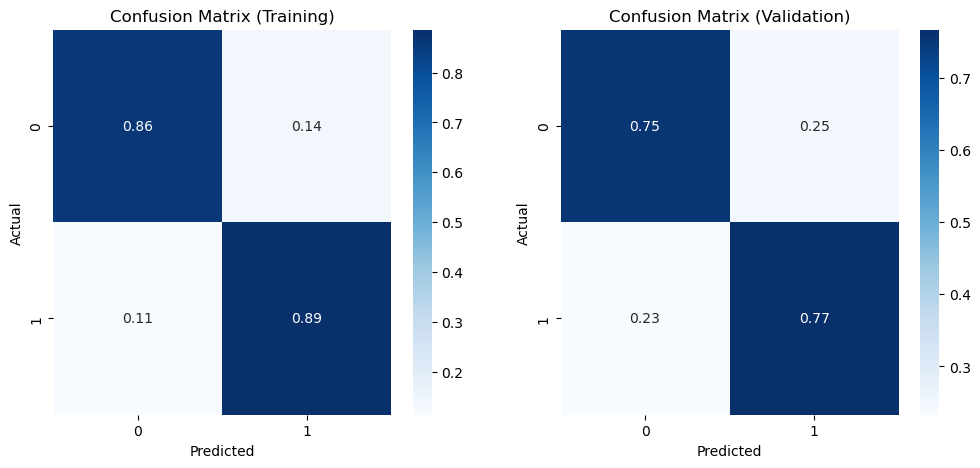

In [39]:
# Create the XGBoost classifier model
xgboost_model = XGBClassifier()

# Fit the model to the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = xgboost_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = xgboost_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.8"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of XGBoost</b></span>

Training Accuracy: 0.9181318681318681
Validation Accuracy: 0.7674199623352166


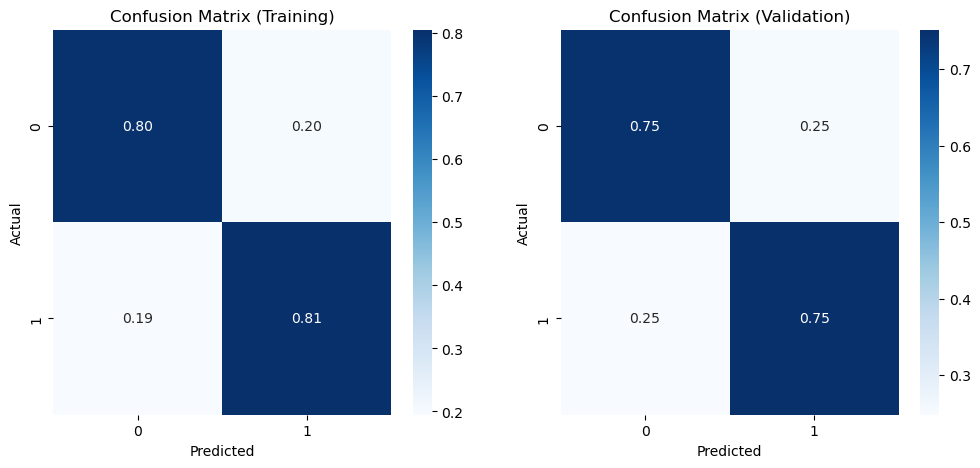

In [44]:
# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Create the XGBoost classifier model
xgboost_model = XGBClassifier(objective='binary:logistic', eval_metric = 'logloss', base_score = 0.5)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

final_model = best_model

## 3.2.9 | LightGBM Classifier

[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
Training Accuracy: 0.8016483516483517
Validation Accuracy: 0.7492153170119272


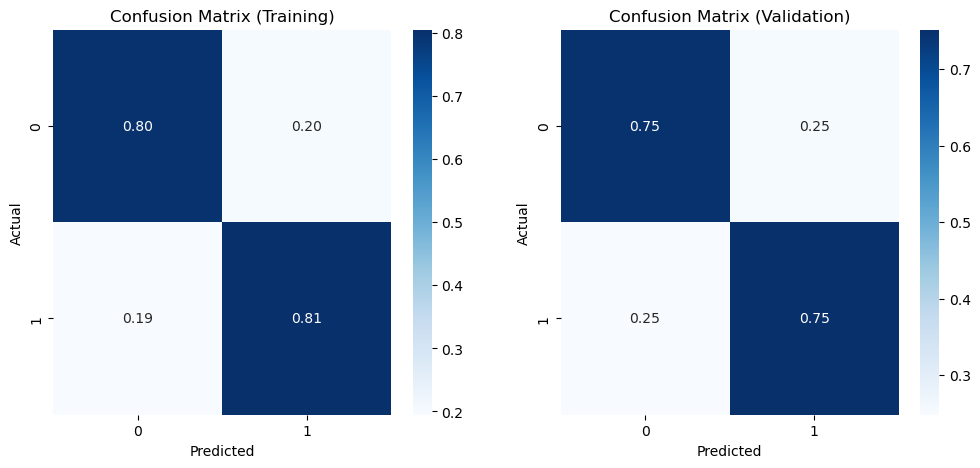

In [41]:
# Create the Light Gradient Boosting classifier model
lgbm_model = LGBMClassifier()

# Fit the model to the training data
lgbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = lgbm_model.predict(X_train)

# Make predictions on the validation data
y_test_pred = lgbm_model.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Create confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred, normalize='true')
val_confusion = confusion_matrix(y_test, y_test_pred, normalize='true')

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

<a id="3.3.9"></a>
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Hyperparameter Tuning of LightGBM</b></span>

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Total Bins 838
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscor

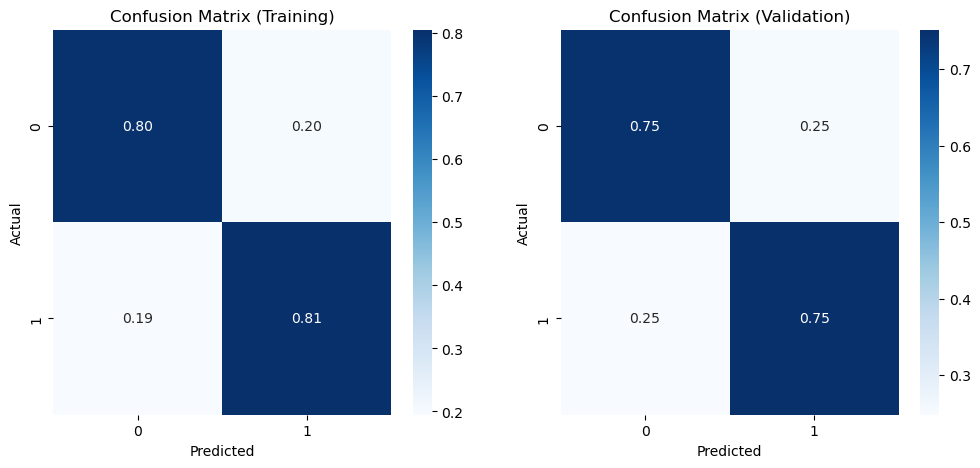

In [42]:
# Define the hyperparameter grid to search
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Create the Light Gradient Boosting classifier model
lgbm_model = LGBMClassifier(objective='binary', boosting_type='gbdt', eval_metric = 'logloss', base_score = 0.5, force_col_wise='true')

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lgbm_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

In [52]:
import pickle
final_model

# Open a file for writing in binary mode
with open("final_model.pkl", "wb") as f:
    # Pickle the random value to the file
    pickle.dump(final_model, f)

# 4. Model Deployment

PIC : Kemas

## 4.1 Streamlit App

In [51]:
# import streamlit as st
# import streamlit.components.v1 as stc
# import pickle
# import pandas as pd
# import numpy as np

# with open('model/final_model.pkl','rb') as file:
#     Random_Forest_Model = pickle.load(file)

# def main():
#     # stc.html(html_temp)
#     st.title("Customer Churn Prediction App")
#     st.caption("This app is created by Algowizard Team for Final Project of Data Science Bootcamp")

#     menu = ["Home","Machine Learning"]
#     choice = st.sidebar.selectbox("Menu", menu)

#     if choice == "Home":
#         st.header("Home")
#         st.caption("Aplikasi prediksi churn memanfaatkan pembelajaran mesin dan kecerdasan buatan untuk menganalisis data pelanggan dan mengidentifikasi mereka yang berisiko pergi. Hal ini memungkinkan bisnis untuk secara proaktif melibatkan pelanggan ini dengan intervensi yang ditargetkan dan strategi retensi, meminimalkan churn dan meningkatkan nilai umur pelanggan.")

#         st.markdown("""
#             <p style="font-size: 16px; font-weight: bold">Sekilas tentang Dataset yang digunakan</p>
#             """, unsafe_allow_html=True)

#         df = pd.DataFrame(np.random.randn(10, 5), columns=("col %d" % i for i in range(5)))
#         st.table(df)


#     elif choice == "Machine Learning":
#         st.header("Prediction Model")
#         run_ml_app()

#     col1, col2, col3 = st.columns([1, 10, 1])  # Center column takes up most of the width
#     with col2:
#         images = ["1. Ola.png", "2. July.png", "3. Faza.png","4. Timmy.png",
#               "5. Kemas.png", "6. Eko.png", "7. Osha.png"]
#         st.image(images, width=80)  # Set width for each image

# def run_ml_app():
#     # design = """<div style='padding:15px;">
#     #                 <h1 style='color:#fff'>Loan Eligibility Prediction</h1>
#     #             </div>"""
#     # st.markdown(design, unsafe_allow_html=True)

#     st.markdown("""
#     <p style="font-size: 16px; font-weight: bold">Insert Data</p>
#     """, unsafe_allow_html=True)

#     left, right = st.columns((2,2))
#     gender = left.selectbox('Gender',
#                             ('Male', 'Female'))
#     age = left.number_input('Age', 1, 100)
#     credit_score = left.number_input('Credit Score',0,1000)
#     estimated_salary = right.number_input('Estimated Salary',0.0,100000000.00)
#     has_credit_card = right.selectbox('Credit Card',('Yes','No'))

#     # married = right.selectbox('Married', ('Yes','No'))
#     # dependent = left.selectbox('Dependents', ('None', 'One', 'Two', 'Three'))
#     # education = right.selectbox('Education', ('Graduate', 'Non-Graduate'))
#     # self_employed = left.selectbox('Self-Employed', ('Yes', 'No'))
#     # applicant_income = right.number_input('Applicant Income')
#     # coApplicant_income = left.number_input(
#     #     'Co - Applicant Income')
#     # loan_amount = right.number_input('Loan Amount')
#     # loan_amount_term = left.number_input('Loan Tenor (In Months)')
#     # credit_history = right.number_input('Credit History', 0.0, 1.0)
#     # property_area = st.selectbox('Property Area', ('Semiurban','Urban', 'Rural'))
#     button = st.button('Predict')

#     #if button is clicked (ketika button dipencet)
#     if button:
#         #make prediction
#         result = predict(gender,age,credit_score,estimated_salary,has_credit_card)
#         if result == 'Eligible':
#             st.success(f'You are {result} for the loan')
#         else:
#             st.warning(f'You are {result} for the loan')


# def predict(gender,age,credit_score,estimated_salary,has_credit_card):
#     #processing user input
#     gen = 0 if gender == 'Male' else 1
#     cre = 0 if has_credit_card == 'No' else 1
#     # mar = 0 if married == 'Yes' else 1
#     # dep = float(0 if dependent == 'None' else 1 if dependent == 'One' else 2 if dependent == 'Two' else 3)
#     # edu = 0 if education == 'Graduate' else 1
#     # sem = 0 if self_employed == 'Yes' else 1
#     # pro = 0 if property_area == 'Semiurban' else 1 if property_area == 'Urban' else 2
#     # lam = loan_amount/1000
#     # cap = coApplicant_income / 1000

#     #Making prediction
#     prediction = Random_Forest_Model.predict([[gen, cre, age, credit_score,
#                                                estimated_salary]])
#     result = 'Stayed' if prediction == 0 else 'Exited'

#     return result

# if __name__ == "__main__":
#     main()